**Produit par Duplesse Nangmo**

In [1]:
import sympy as sp

# Définition des variables symboliques
y, y_hat = sp.symbols('y y_hat')

# Fonction de perte MSE pour une seule observation
MSE = (y - y_hat)**2

# Calcul du gradient par rapport à y_hat
grad_MSE = sp.diff(MSE, y_hat)

print("MSE :", MSE)
print("Gradient de la MSE :", grad_MSE)


MSE : (y - y_hat)**2
Gradient de la MSE : -2*y + 2*y_hat


Etape 2 : convexite

In [2]:
# Dérivée seconde pour vérifier convexité
second_derivative = sp.diff(MSE, y_hat, 2)
print("Dérivée seconde :", second_derivative)


Dérivée seconde : 2


Si la dérivée seconde > 0 pour tout Y_hat, la fonction est convexe.

Ici, 2 > 0 → MSE est convexe partout.

**Jeux de donner pour la regression**

Nom : Iris (subset versicolor)

Attributs explicatifs : sepal length et sepal width

Variable cible : petal length

Nombre d’observations : 50 (classe versicolor seulement)

Source : sklearn.datasets.load_iris()

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Sélection de la classe versicolor (target = 1)
df_reg = df[df['species']==1][['sepal length (cm)','sepal width (cm)','petal length (cm)']]
df_reg.head()


,sepal length (cm),sepal width (cm),petal length (cm)
50,7.0,3.2,4.7
51,6.4,3.2,4.5
52,6.9,3.1,4.9
53,5.5,2.3,4.0
54,6.5,2.8,4.6


Représentation de la MSE pour une observation

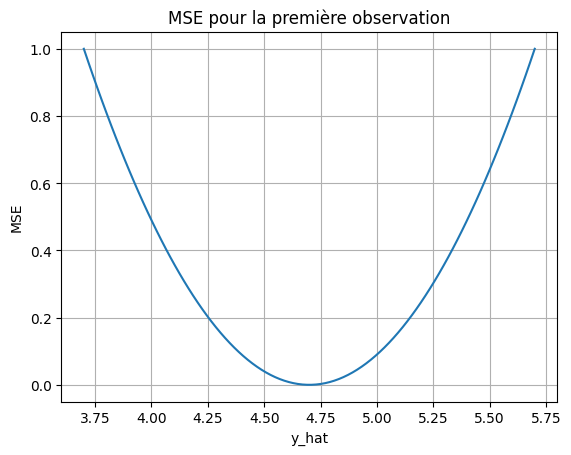

In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt

    y_obs = df_reg['petal length (cm)'].iloc[0]

    y_hat_vals = np.linspace(y_obs-1, y_obs+1, 100)
    mse_vals = (y_obs - y_hat_vals)**2

    plt.plot(y_hat_vals, mse_vals)
    plt.title("MSE pour la première observation")
    plt.xlabel("y_hat")
    plt.ylabel("MSE")
    plt.grid(True)
    plt.show()


In [3]:
from sympy import symbols, Eq, solve

x, y = symbols('x y')
a, b = 2, 1
x0, y0 = 1, 0.5

tangente_eq = Eq((x0*x)/a**2 + (y0*y)/b**2, 1)
print("Equation de la tangente :", tangente_eq)

# Résolution pour y
y_sol = solve(tangente_eq, y)
print("y =", y_sol[0])


Equation de la tangente : Eq(x/4 + 0.5*y, 1)
y = 2.0 - 0.5*x


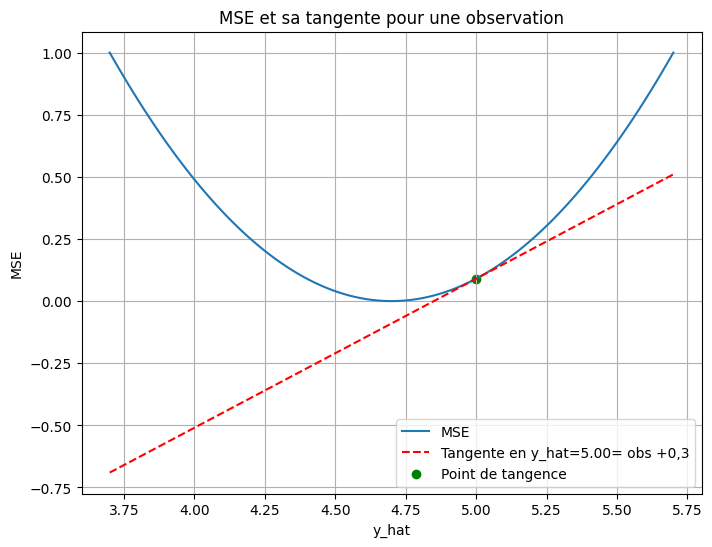

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# --- Valeur réelle de la première observation ---
y_obs = df_reg['petal length (cm)'].iloc[0]

# --- Courbe de la MSE ---
y_hat_vals = np.linspace(y_obs-1, y_obs+1, 100)
mse_vals = (y_obs - y_hat_vals)**2

# --- Point pour la tangente ---
y_hat0 = y_obs + 0.3  # on choisit un point autour de y_obs
mse0 = (y_obs - y_hat0)**2

# --- Calcul du gradient (dérivée) de la MSE ---
y_hat = sp.symbols('y_hat')
MSE_expr = (y_obs - y_hat)**2
grad_MSE = sp.diff(MSE_expr, y_hat)
slope = float(grad_MSE.subs(y_hat, y_hat0))

# --- Equation de la tangente ---
# y - mse0 = slope * (x - y_hat0)
tangent_vals = slope * (y_hat_vals - y_hat0) + mse0

# --- Tracé ---
plt.figure(figsize=(8,6))
plt.plot(y_hat_vals, mse_vals, label="MSE")
plt.plot(y_hat_vals, tangent_vals, 'r--', label=f"Tangente en y_hat={y_hat0:.2f}= obs +0,3")
plt.scatter([y_hat0], [mse0], color='green', label="Point de tangence")
plt.xlabel("y_hat")
plt.ylabel("MSE")
plt.title("MSE et sa tangente pour une observation")
plt.grid(True)
plt.legend()
plt.show()
